In [16]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 90% !important; }</style>"))

import sys

additional_paths = ['../']

for path in additional_paths:
    if path not in sys.path:
        sys.path.append(path)
        
import os
# Uncomment for CPU
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import utils.hdf5_experiment as EXP
import sacred
import matplotlib.pyplot as plt

tf.__version__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.1.0'

<KeysViewHDF5 ['actions', 'checkpoints', 'observations', 'rewards', 'track', 'track_len']>


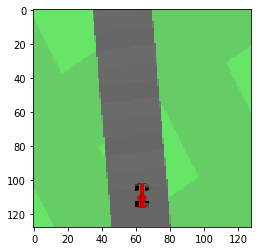

In [13]:
print(EXP.HD.keys())

im = EXP.OBSERVATIONS[0, 900]
plt.imshow(im / 255)

In [14]:
@EXP.EX.config
def config():
    SEQ_LEN = 128
    W, H = 128, 128
    internal_size = 32
    batch_size = 4
    steps_per_epoch = 128
    lr = 0.001
    weight_decay = 0.0001
    should_preload_model = True

INFO - DRNN Car Racing 3 - Running command 'main'
INFO - DRNN Car Racing 3 - Started run with ID "65"


(None, None, 32)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
condition (InputLayer)          [(None, 12, 2)]      0                                            
__________________________________________________________________________________________________
action (InputLayer)             [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
initializer (Sequential)        (None, 32)           2320        condition[0][0]                  
__________________________________________________________________________________________________
memory (Model)                  (None, None, 32)     16608       action[0][0]                     
                                                                 initializer[

WARNING - tensorflow - From ../utils/hdf5_experiment.py:128: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Train for 128 steps, validate for 2 steps
Added image/png as content-type of artifact /home/izpc/workspace/differentiable-simulation/notebooks/pred_rollout.png.


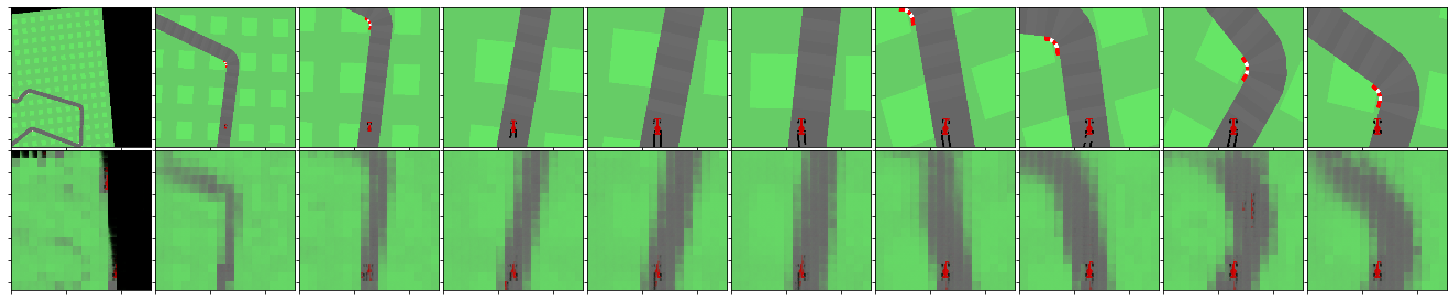

Epoch 1/2000
  1/128 [..............................] - ETA: 11:49

ERROR - DRNN Car Racing 3 - Failed after 0:00:12!


KeyError: 'loss'

In [17]:
# EXP.EX.observers.append(sacred.observers.MongoObserver())
EXP.EX.run(config_updates={'should_preload_model': True})

In [21]:
EXP.MODEL.net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
condition (InputLayer)          [(None, 12, 2)]      0                                            
__________________________________________________________________________________________________
action (InputLayer)             [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
initializer (Sequential)        (None, 32)           2320        condition[0][0]                  
__________________________________________________________________________________________________
memory (Model)                  (None, None, 32)     16608       action[0][0]                     
                                                                 initializer[1][0]            